In [4]:
data_df.shape

(282768, 2813)

In [5]:


cols = ['CRKEVER', 'COCEVER', 'IRALCFY', 'CATAG3', 'HEALTH', 'IRWRKSTAT', 'IREDUHIGHST2', 'NEWRACE2', 'IRSEX', 
'IRPINC3', 'IRKI17_2',  'IRMJFY',  'WRKDHRSWK2', 'IRHHSIZ2', 'CIG30USE', 'IRHERFY', 'IRMETHAMYFQ', 'year']

In [6]:
missing_cols = [col for col in cols if col not in data_df.columns]
if missing_cols:
    print(f"The following columns are missing in the DataFrame: {missing_cols}")

In [7]:
if_col = [col for col in cols if col in data_df.columns]
print(if_col)


['CRKEVER', 'COCEVER', 'IRALCFY', 'CATAG3', 'HEALTH', 'IRWRKSTAT', 'IREDUHIGHST2', 'NEWRACE2', 'IRSEX', 'IRPINC3', 'IRKI17_2', 'IRMJFY', 'WRKDHRSWK2', 'IRHHSIZ2', 'CIG30USE', 'IRHERFY', 'IRMETHAMYFQ', 'year']


In [8]:
selected_cols_df = data_df[if_col]

In [9]:
selected_cols_df.isna().sum()

CRKEVER         0
COCEVER         0
IRALCFY         0
CATAG3          0
HEALTH          0
IRWRKSTAT       0
IREDUHIGHST2    0
NEWRACE2        0
IRSEX           0
IRPINC3         0
IRKI17_2        0
IRMJFY          0
WRKDHRSWK2      0
IRHHSIZ2        0
CIG30USE        0
IRHERFY         0
IRMETHAMYFQ     0
year            0
dtype: int64

In [10]:
cl_df = selected_cols_df.copy(deep=True)

In [9]:
for i, col in enumerate(cols):
    print(f"Column {i + 1}: {col}")
    print(cl_df[col].unique())
    print("-" * 40)


Column 1: CRKEVER
[91  1  2 94 97 98 85]
----------------------------------------
Column 2: COCEVER
[ 2  1 97 94 85]
----------------------------------------
Column 3: IRALCFY
[  5  52  48   2   6 120  84 991  12  24 993  14  96   3 360 260 144 156
 340 336 104   7  29  36 350 208 312   1  32 338  30 168 364   4  60  72
 363 365  40  51 353  20   9  15   8  10 180 240  26  53 339  19 345 288
  11 300 108  90 216 361  61  21  25 341  13 196  83 228  18  50  58  45
  22 362 250  42  17 342  44 357 276  28 358  70  89  43  35 100 351 344
 210 355  49 192  78 141  64 275 110  80  47 150  27 200 133  16  67 132
 106  46  79 297 324  75  34 145  56  23 280  97  31 313 261 204 359 264
 165 252 348  38 337 325 138 153  95  87 356 160  33 179  94  39 347 187
 171  55  65 117 157  71 155 164 176 343  74 140 290  62 220 265 190  91
 102 126 151 121  66 105 109  59  68  73 119 123  37  41 256  54 235  63
 175 111  57 330 112  98 268 149  93 195  92 274 225 285 241 143 166 212
 147 103 230 163 349 

In [11]:
continuous_cols = ['IRALCFY', 'IRMJFY', 'WRKDHRSWK2', 'IRHERFY', 'IRMETHAMYFQ' ]
ordinal_cols =[x for x in cols if x not in continuous_cols]
print(ordinal_cols)


['CRKEVER', 'COCEVER', 'CATAG3', 'HEALTH', 'IRWRKSTAT', 'IREDUHIGHST2', 'NEWRACE2', 'IRSEX', 'IRPINC3', 'IRKI17_2', 'IRHHSIZ2', 'CIG30USE', 'year']


In [12]:
def continuous_clean_data(x):
    bad_data_codes = {-9, 985, 989} | set(range(994, 1000)) #codes for "bad data", "dont know", "skip", "refused", or "blank"
    zero_data_codes = {991, 993} #codes for never done, not done which is equal to 0 as number
     
    if x in bad_data_codes: return np.nan
    if x in zero_data_codes: return 0
    return x

def ordinal_clean_data(x):
    bad_data_codes = {-9, 85, 89} | set(range(94, 100)) #codes for "bad data", "dont know", "skip", "refused", or "blank"
    zero_data_codes = {91, 93} #codes for never done, not done which is equal to 0 as number
    
    if x in bad_data_codes: return np.nan
    if x in zero_data_codes: return 0
    return x

In [12]:
import numpy as np
# Changes for wrkdhrsw2
cl_df.loc[(cl_df.IRWRKSTAT == 3) | (cl_df.IRWRKSTAT == 4), "WRKDHRSWK2"] = 0
cl_df.loc[cl_df.WRKDHRSWK2 == 61, "WRKDHRSWK2"] = np.nan

# Changes for binary categorical variables
cl_df.loc[(cl_df.COCEVER == 2), "COCEVER"] = 0
cl_df.loc[(cl_df.CRKEVER == 2), "CRKEVER"] = 0
cl_df.loc[(cl_df.IRSEX == 2), "IRSEX"] = 0

# Apply clean_data functions
cl_df[continuous_cols] = cl_df[continuous_cols].applymap(continuous_clean_data)
cl_df[ordinal_cols] = cl_df[ordinal_cols].applymap(ordinal_clean_data)

cl_df

/var/folders/9n/27ybx2053616fhxv3ncx4v380000gn/T/ipykernel_34396/278209739.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cl_df[continuous_cols] = cl_df[continuous_cols].applymap(continuous_clean_data)
/var/folders/9n/27ybx2053616fhxv3ncx4v380000gn/T/ipykernel_34396/278209739.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cl_df[ordinal_cols] = cl_df[ordinal_cols].applymap(ordinal_clean_data)


,CRKEVER,COCEVER,IRALCFY,CATAG3,HEALTH,IRWRKSTAT,IREDUHIGHST2,NEWRACE2,IRSEX,IRPINC3,IRKI17_2,IRMJFY,WRKDHRSWK2,IRHHSIZ2,CIG30USE,IRHERFY,IRMETHAMYFQ,year
0,0.0,0.0,5,1,2.0,4.0,7,1,1,1,2,0,0.0,1,0.0,0,0,2015
1,1.0,1.0,52,4,1.0,1.0,8,7,1,2,3,364,40.0,4,0.0,0,0,2015
2,0.0,0.0,48,3,2.0,4.0,11,1,0,1,1,0,0.0,1,0.0,0,0,2015
3,0.0,0.0,2,1,3.0,NaN,4,7,0,1,4,0,NaN,5,0.0,0,0,2015
4,0.0,0.0,6,2,3.0,4.0,9,1,0,1,3,0,0.0,4,22.0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282763,0.0,0.0,104,2,2.0,1.0,9,7,0,3,1,2,40.0,2,0.0,0,0,2019
282764,0.0,0.0,10,3,2.0,2.0,11,5,0,2,1,0,26.0,2,0.0,0,0,2019
282765,0.0,0.0,0,1,2.0,NaN,4,1,1,1,3,0,NaN,6,0.0,0,0,2019
282766,0.0,0.0,1,1,2.0,3.0,11,7,0,1,4,0,0.0,6,0.0,0,0,2019


In [ ]:
# def cont_clean_data(x):

#     # Survey codes for "Bad Data", Don't Know, Skip, Refused, or Blank
#     if ((x == -9) |
#     (x == 985) |
#     (x == 989) |
#     ((x >= 994) & (x < 1000))):
#         return np.nan

#     # Codes for "Have never done..." or "Have not done in the past X days"
#     # Equivalent to 0 for numbered questions
#     if ((x == 991) | 
#     (x == 993)):
#         return 0

#     # Ignore value if conditions don't match
#     return x 

# # Function that cleans all other special data codes
# def ord_clean_data(x):

#     # Survey codes for "Bad Data", Don't Know, Skip, Refused, or Blank
#     if ((x == -9) |
#     ((x >= 94) & (x < 100)) |
#     (x == 85) |
#     (x == 89)):
#         return np.nan

#     # Codes for "Have never done..." or "Have not done in the past X days"
#     # Equivalent to 0 for numbered questions
#     if ((x == 91) |
#     (x == 93)):
#         return 0

#     # Ignore value if conditions don't match
#     return x 


In [ ]:
# import numpy as np
# # Changes for wrkdhrsw2
# cl_df.loc[(cl_df.IRWRKSTAT == 3) | (cl_df.IRWRKSTAT == 4), "WRKDHRSWK2"] = 0
# cl_df.loc[cl_df.WRKDHRSWK2 == 61, "WRKDHRSWK2"] = np.nan

# # Changes for binary categorical variables
# cl_df.loc[(cl_df.COCEVER == 2), "COCEVER"] = 0
# cl_df.loc[(cl_df.CRKEVER == 2), "CRKEVER"] = 0
# cl_df.loc[(cl_df.IRSEX == 2), "IRSEX"] = 0

# # Apply clean_data functions
# cl_df[continuous_cols] = cl_df[continuous_cols].applymap(continuous_clean_data)
# cl_df[ordinal_cols] = cl_df[ordinal_cols].applymap(ordinal_clean_data)

# cl_df

In [13]:
for i, col in enumerate(cols):
    print(f"Column {i + 1}: {col}")
    print(cl_df[col].unique())
    print("-" * 40)

Column 1: CRKEVER
[91  1  2 94 97 98 85]
----------------------------------------
Column 2: COCEVER
[ 2  1 97 94 85]
----------------------------------------
Column 3: IRALCFY
[  5  52  48   2   6 120  84 991  12  24 993  14  96   3 360 260 144 156
 340 336 104   7  29  36 350 208 312   1  32 338  30 168 364   4  60  72
 363 365  40  51 353  20   9  15   8  10 180 240  26  53 339  19 345 288
  11 300 108  90 216 361  61  21  25 341  13 196  83 228  18  50  58  45
  22 362 250  42  17 342  44 357 276  28 358  70  89  43  35 100 351 344
 210 355  49 192  78 141  64 275 110  80  47 150  27 200 133  16  67 132
 106  46  79 297 324  75  34 145  56  23 280  97  31 313 261 204 359 264
 165 252 348  38 337 325 138 153  95  87 356 160  33 179  94  39 347 187
 171  55  65 117 157  71 155 164 176 343  74 140 290  62 220 265 190  91
 102 126 151 121  66 105 109  59  68  73 119 123  37  41 256  54 235  63
 175 111  57 330 112  98 268 149  93 195  92 274 225 285 241 143 166 212
 147 103 230 163 349 

In [14]:
cl_df.isna().sum()

CRKEVER           133
COCEVER           116
IRALCFY             0
CATAG3              0
HEALTH             55
IRWRKSTAT       33375
IREDUHIGHST2        0
NEWRACE2            0
IRSEX               0
IRPINC3             0
IRKI17_2            0
IRMJFY              0
WRKDHRSWK2      55261
IRHHSIZ2            0
CIG30USE          550
IRHERFY             0
IRMETHAMYFQ         0
year                0
dtype: int64

In [14]:
# cl_df['COCCRKEVER'] = np.zeros(df.shape[0])
# cl_df.loc[(cl_df.COCEVER == 1) | (cl_df.CRKEVER == 1), "COCCRKEVER"] = 1

# cl_df.loc[(cl_df.COCEVER == np.nan) & (cl_df.CRKEVER == np.nan), "COCCRKEVER"] = np.nan
# cl_df

cl_df['COCCRKEVER'] = np.nan
cl_df.loc[(~pd.isna(cl_df['COCEVER'])) | (~pd.isna(cl_df['CRKEVER'])), 'COCCRKEVER'] = 0

# Update 'COCCRKEVER' to 1 if either COCEVER or CRKEVER equals 1
cl_df.loc[(cl_df['COCEVER'] == 1) | (cl_df['CRKEVER'] == 1), 'COCCRKEVER'] = 1

cl_df

,CRKEVER,COCEVER,IRALCFY,CATAG3,HEALTH,IRWRKSTAT,IREDUHIGHST2,NEWRACE2,IRSEX,IRPINC3,IRKI17_2,IRMJFY,WRKDHRSWK2,IRHHSIZ2,CIG30USE,IRHERFY,IRMETHAMYFQ,year,COCCRKEVER
0,91,2,5,1,2,4,7,1,1,1,2,991,999,1,93,991,991,2015,0.0
1,1,1,52,4,1,1,8,7,1,2,3,364,40,4,93,991,991,2015,1.0
2,91,2,48,3,2,4,11,1,2,1,1,991,999,1,91,991,991,2015,0.0
3,91,2,2,1,3,99,4,7,2,1,4,991,999,5,91,991,991,2015,0.0
4,91,2,6,2,3,4,9,1,2,1,3,991,999,4,22,991,991,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282763,91,2,104,2,2,1,9,7,2,3,1,2,40,2,93,991,991,2019,0.0
282764,91,2,10,3,2,2,11,5,2,2,1,993,26,2,91,991,991,2019,0.0
282765,91,2,991,1,2,99,4,1,1,1,3,991,999,6,91,991,991,2019,0.0
282766,91,2,1,1,2,3,11,7,2,1,4,993,999,6,91,991,991,2019,0.0


In [15]:
# cl_df.drop('coccrkever', axis=1)
cl_df.isna().sum()

CRKEVER         0
COCEVER         0
IRALCFY         0
CATAG3          0
HEALTH          0
IRWRKSTAT       0
IREDUHIGHST2    0
NEWRACE2        0
IRSEX           0
IRPINC3         0
IRKI17_2        0
IRMJFY          0
WRKDHRSWK2      0
IRHHSIZ2        0
CIG30USE        0
IRHERFY         0
IRMETHAMYFQ     0
year            0
COCCRKEVER      0
dtype: int64

In [16]:
cl_df[['COCEVER','CRKEVER','COCCRKEVER']].sum()

COCEVER         543036.0
CRKEVER       22761497.0
COCCRKEVER       33316.0
dtype: float64

In [17]:
from scipy.stats import chi2_contingency, chi2

In [18]:
# df2_clean will be cl_df with no NaN values
df2_clean = cl_df.copy(deep=True)
df2_clean = df2_clean.drop(['IRWRKSTAT'], axis=1).dropna()
df2_clean.isna().sum()


CRKEVER         0
COCEVER         0
IRALCFY         0
CATAG3          0
HEALTH          0
IREDUHIGHST2    0
NEWRACE2        0
IRSEX           0
IRPINC3         0
IRKI17_2        0
IRMJFY          0
WRKDHRSWK2      0
IRHHSIZ2        0
CIG30USE        0
IRHERFY         0
IRMETHAMYFQ     0
year            0
COCCRKEVER      0
dtype: int64

In [19]:
df2_clean.isna().sum()

CRKEVER         0
COCEVER         0
IRALCFY         0
CATAG3          0
HEALTH          0
IREDUHIGHST2    0
NEWRACE2        0
IRSEX           0
IRPINC3         0
IRKI17_2        0
IRMJFY          0
WRKDHRSWK2      0
IRHHSIZ2        0
CIG30USE        0
IRHERFY         0
IRMETHAMYFQ     0
year            0
COCCRKEVER      0
dtype: int64

In [20]:
import seaborn as sns
sns.set(font_scale=1.2)

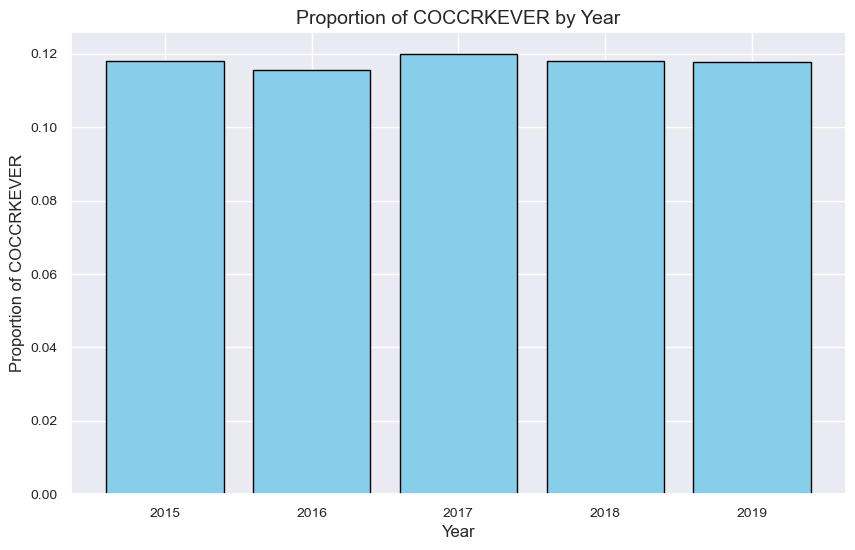

In [21]:
import matplotlib.pyplot as plt

# Aggregate the data to calculate the proportion of COCCRKEVER per year
df_agg = (
    df2_clean.groupby("year")["COCCRKEVER"]
    .apply(lambda x: sum(x) / len(x))
    .reset_index()
)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_agg["year"], df_agg["COCCRKEVER"], color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Proportion of COCCRKEVER", fontsize=12)
plt.title("Proportion of COCCRKEVER by Year", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


In [22]:
# Observe the total "Yes" and "No" answers for crack/cocaine users by year
df2_clean.groupby('COCCRKEVER').year.value_counts()

COCCRKEVER  year
0.0         2015    50408
            2016    50318
            2018    49671
            2017    49531
            2019    49524
1.0         2017     6745
            2015     6738
            2018     6642
            2019     6612
            2016     6579
Name: count, dtype: int64

In [23]:
no_values = []
yes_values = []

# Append lists with yes/no values, where indices correspond to a given year
for year in range(2015, 2020):
    no_values.append(df2_clean.groupby('COCCRKEVER').year.value_counts()[0][year])
    yes_values.append(df2_clean.groupby('COCCRKEVER').year.value_counts()[1][year])

# Create 2D matrix of values
chi_matrix = [no_values, yes_values]
chi_matrix

[[50408, 50318, 49531, 49671, 49524], [6738, 6579, 6745, 6642, 6612]]

In [24]:
# Use alpha of 0.05, but in reality our test is two-tailed
significance = 0.05
stat, p, dof, expected = chi2_contingency(chi_matrix)
critical = chi2.ppf(significance, dof)
print("P-value = %f\nChi-Squared Stat = %f\nCritical Value = %f" %(p, stat, critical))

P-value = 0.299515
Chi-Squared Stat = 4.882996
Critical Value = 0.710723


In [25]:
# Function for easily plotting sns barplots on a grid
def plot_bar(data, grid, x, y, xlabel, ylabel, title, xticklabels, rotation=0):
    ax = fig.add_subplot(grid[0], grid[1], grid[2])
    sns.barplot(data=data, x=x, y=y, 
    estimator=(lambda x: sum(x)/len(x)), ax=ax).set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_xticklabels(xticklabels, rotation=rotation)

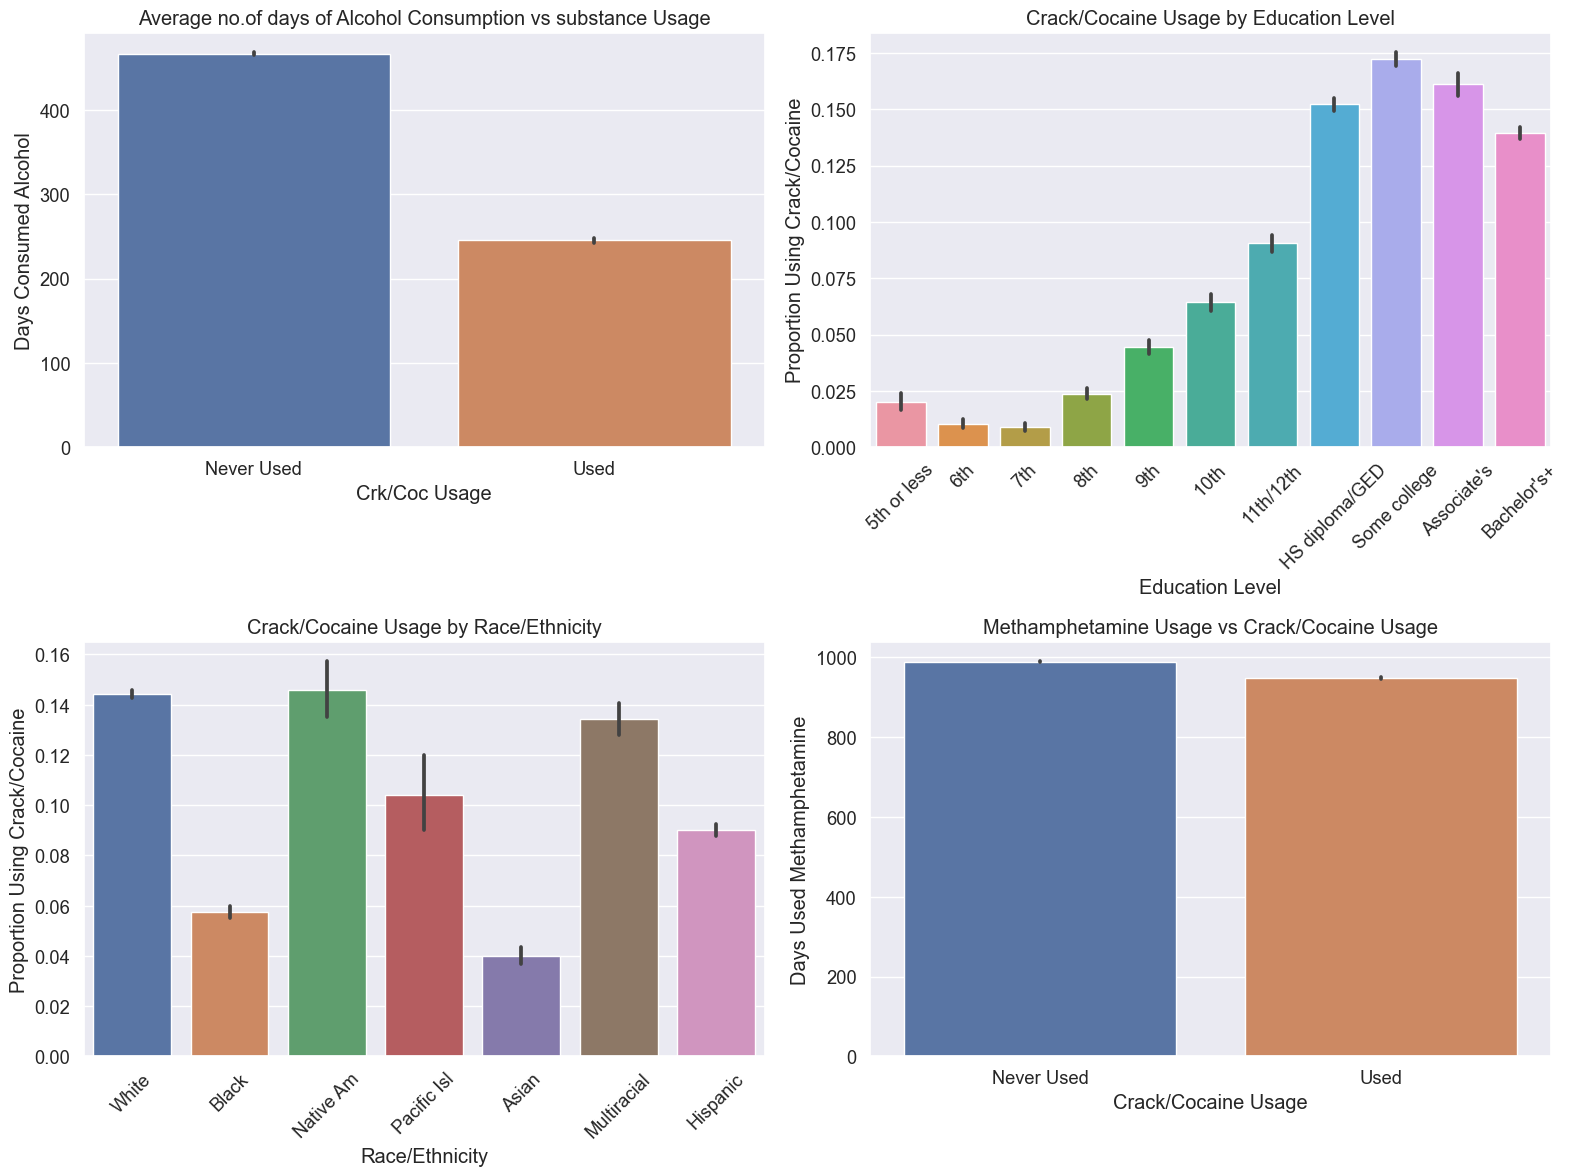

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plotting parameters
# plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.7

# Create main figure
fig = plt.figure()

# Original plots with enhanced styling
plot_bar(df2_clean,[2, 2, 1], 'COCCRKEVER', 'IRALCFY', 'Crk/Coc Usage', 'Days Consumed Alcohol', 
         "Average no.of days of Alcohol Consumption vs substance Usage", 
         ["Never Used", "Used"])

plot_bar(df2_clean,[2, 2, 2], 'IREDUHIGHST2', 'COCCRKEVER', 'Education Level', 
         'Proportion Using Crack/Cocaine', 
         "Crack/Cocaine Usage by Education Level",
         ["5th or less", "6th", "7th", "8th", "9th", "10th", "11th/12th", 
          "HS diploma/GED", "Some college", "Associate's", "Bachelor's+"], 45)

plot_bar(df2_clean,[2, 2, 3], 'NEWRACE2', 'COCCRKEVER', 'Race/Ethnicity', 
         'Proportion Using Crack/Cocaine', 
         "Crack/Cocaine Usage by Race/Ethnicity", 
         ["White", "Black", "Native Am", "Pacific Isl", "Asian", "Multiracial", "Hispanic"], 45)

plot_bar(df2_clean,[2, 2, 4], 'COCCRKEVER', 'IRMETHAMYFQ', 'Crack/Cocaine Usage', 
         'Days Used Methamphetamine', 
         "Methamphetamine Usage vs Crack/Cocaine Usage", ["Never Used", "Used"])

# # Add a correlation heatmap
# plt.figure(figsize=(10, 8))
# substance_cols = ['IRALCFY', 'IRMETHAMYFQ', 'COCCRKEVER']
# sns.heatmap(df2_clean[substance_cols].corr(), annot=True, cmap='coolwarm', center=0)
# plt.title("Correlation between Substance Usage")

# # Add distribution plots
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# sns.boxplot(x='COCCRKEVER', y='IRALCFY', data=df2_clean, ax=axes[0])
# axes[0].set_title('Alcohol Usage Distribution by Crack/Cocaine Usage')

# sns.boxplot(x='COCCRKEVER', y='IRMETHAMYFQ', data=df2_clean, ax=axes[1])
# axes[1].set_title('Methamphetamine Usage Distribution by Crack/Cocaine Usage')

plt.tight_layout()
plt.show()

In [ ]:
# Pickle our data
df2_clean.to_pickle("./NSDUH_cleaned_dropna_2016-2019.pkl")
# df2_clean = pd.read_pickle("./NSDUH_cleaned_dropna_2016-2019.pkl")

In [27]:
df2_clean.columns

Index(['CRKEVER', 'COCEVER', 'IRALCFY', 'CATAG3', 'HEALTH', 'IREDUHIGHST2',
       'NEWRACE2', 'IRSEX', 'IRPINC3', 'IRKI17_2', 'IRMJFY', 'WRKDHRSWK2',
       'IRHHSIZ2', 'CIG30USE', 'IRHERFY', 'IRMETHAMYFQ', 'year', 'COCCRKEVER'],
      dtype='object')

In [28]:
def explore_features(df, cols):
    """
    Explore basic statistics and properties of selected features
    
    Parameters:
    df: DataFrame containing the data
    cols: List of column names to explore
    """
    print("Dataset Shape:", df.shape)
    
    # Check which features are available
    available_cols = [col for col in cols if col in df.columns]
    missing_cols = [col for col in cols if col not in df.columns]
    
    print("\nAvailable Features:", len(available_cols))
    print("Missing Features:", missing_cols if missing_cols else "None")
    
    # Basic statistics for each feature
    print("\nFeature Statistics:")
    for col in available_cols:
        print(f"\n{col}:")
        print("Type:", df[col].dtype)
        print("Unique values:", df[col].nunique())
        print("Missing values:", df[col].isna().sum(), 
              f"({(df[col].isna().sum()/len(df))*100:.2f}%)")
        print("Value counts:")
        print(df[col].value_counts().head())

# Initial feature list
cols = [ "CRKEVER", "COCEVER", "IRALCFY", "CATAG3", "HEALTH", 
    "IRWRKSTAT", "IREDUHIGHST2", "NEWRACE2", "IRSEX", 
    "IRPINC3", "IRKI17_2", "IRMJFY", "WRKDHRSWK2", 
    "IRHHSIZ2", "CIG30USE", "IRHERFY", "IRMETHAMYFQ", "YEAR"
]

# Run exploration
explore_features(df2_clean, cols)

Dataset Shape: (282768, 18)

Available Features: 16
Missing Features: ['IRWRKSTAT', 'YEAR']

Feature Statistics:

CRKEVER:
Type: int64
Unique values: 7
Missing values: 0 (0.00%)
Value counts:
CRKEVER
91    249336
2      25721
1       7578
98        60
97        56
Name: count, dtype: int64

COCEVER:
Type: int64
Unique values: 5
Missing values: 0 (0.00%)
Value counts:
COCEVER
2     249336
1      33316
94        60
97        54
85         2
Name: count, dtype: int64

IRALCFY:
Type: int64
Unique values: 287
Missing values: 0 (0.00%)
Value counts:
IRALCFY
991    79565
993    31980
104    14469
52     12712
156    12478
Name: count, dtype: int64

CATAG3:
Type: int64
Unique values: 5
Missing values: 0 (0.00%)
Value counts:
CATAG3
2    69916
1    68263
4    56566
3    44016
5    44007
Name: count, dtype: int64

HEALTH:
Type: int64
Unique values: 8
Missing values: 0 (0.00%)
Value counts:
HEALTH
2    108600
3     74590
1     72117
4     23300
5      4106
Name: count, dtype: int64

IREDUHIGHST2:

In [29]:
final_df = df2_clean.copy(deep=True)


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226977 entries, 0 to 282766
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CRKEVER       226977 non-null  float64
 1   COCEVER       226977 non-null  float64
 2   IRALCFY       226977 non-null  int64  
 3   CATAG3        226977 non-null  int64  
 4   HEALTH        226977 non-null  float64
 5   IREDUHIGHST2  226977 non-null  int64  
 6   NEWRACE2      226977 non-null  int64  
 7   IRSEX         226977 non-null  int64  
 8   IRPINC3       226977 non-null  int64  
 9   IRKI17_2      226977 non-null  int64  
 10  IRMJFY        226977 non-null  int64  
 11  WRKDHRSWK2    226977 non-null  float64
 12  IRHHSIZ2      226977 non-null  int64  
 13  CIG30USE      226977 non-null  float64
 14  IRHERFY       226977 non-null  int64  
 15  IRMETHAMYFQ   226977 non-null  int64  
 16  year          226977 non-null  int64  
 17  COCCRKEVER    226977 non-null  float64
dtypes: float6

In [30]:
final_df = final_df.drop(['COCEVER', 'CRKEVER', 'year'], axis =1)

In [1]:
final_df

NameError: name 'final_df' is not defined

In [31]:
# Continuous variables
num_cols = [
    "IRALCFY",
    "CATAG3",
    "HEALTH",
    "IREDUHIGHST2",
    "IRPINC3",
    "IRKI17_2",
    "IRMJFY",
    "WRKDHRSWK2",
    'IRHHSIZ2',
    'CIG30USE',
    'IRHERFY',
    'IRMETHAMYFQ'
]

# Categorical variables
cat_cols = [
    "NEWRACE2",
    "IRSEX"
]

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
# Create a preprocessor from ColumnTransformer
# StandardScaler() applied to num_cols, and OneHotEncoder() applied to cat_cols
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split

In [33]:
# Define feature and target columns
features = num_cols+cat_cols
target = "COCCRKEVER"

# Standard naming conventions for feature/test datasets
X = final_df[features]
y = final_df[target]

In [47]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226977 entries, 0 to 282766
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IRALCFY       226977 non-null  int64  
 1   CATAG3        226977 non-null  int64  
 2   HEALTH        226977 non-null  float64
 3   IREDUHIGHST2  226977 non-null  int64  
 4   IRPINC3       226977 non-null  int64  
 5   IRKI17_2      226977 non-null  int64  
 6   IRMJFY        226977 non-null  int64  
 7   WRKDHRSWK2    226977 non-null  float64
 8   IRHHSIZ2      226977 non-null  int64  
 9   CIG30USE      226977 non-null  float64
 10  IRHERFY       226977 non-null  int64  
 11  IRMETHAMYFQ   226977 non-null  int64  
 12  NEWRACE2      226977 non-null  int64  
 13  IRSEX         226977 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 26.0 MB
<class 'pandas.core.series.Series'>
Index: 226977 entries, 0 to 282766
Series name: COCCRKEVER
Non-Null Count   Dtype  
--------------   -

(None, None)

In [34]:
from sklearn.model_selection import GridSearchCV


In [37]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Parameter grid for GridSearchCV
model_grid = {
    'random_forest': {
        'model':RandomForestClassifier(random_state=15, n_jobs=7, n_estimators=500),
        'params': {
            'estimator__max_depth': [11, 12, 13, 14],
            'estimator__criterion':['gini', 'entropy']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(random_state=15, n_jobs=7),
        'params': {
            'estimator__C': [0.085, 0.09, 0.092],
            'estimator__solver':['lbfgs', 'liblinear'],
        }
    },
    'svm': {
        'model': svm.LinearSVC(random_state=15, max_iter=100000),
        'params': {
            'estimator__C':[0.52, 0.55, 0.6, 0.65]
        }
    }
    # 'svm': {
    #     'model': SGDClassifier(loss='hinge', random_state=15, max_iter=1000, n_jobs=5), 
    #     'params': {
    #         'estimator__alpha': [0.0001, 0.001, 0.01],  # Alpha for regularization strength
    #     }
    # }
}


In [ ]:
scores = []

for model_name, model_params in model_grid.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('estimator', model_params['model'])
    ])

    model = GridSearchCV(estimator=pipe, param_grid=model_params['params'], cv=4, return_train_score=False, refit=True)
    model.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score:': model.best_score_,
        'best_params': model.best_params_
    })

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

In [ ]:
scores

In [ ]:
X_train

In [ ]:

rf = RandomForestClassifier(random_state=15, n_jobs=5, n_estimators=500, max_depth=14, criterion='gini')
rf.fit(X_train, y_train)

lg = LogisticRegression(random_state=15, solver='liblinear',C=0.085)
lg.fit(X_train, y_train)

lsvc = svm.LinearSVC(random_state=15, max_iter=100000, C=0.52)
lsvc.fit(X_train, y_train)

In [ ]:
random_forest_predict = rf.predict(X_test)
logistic_regression_predict = lg.predict(X_test)
linear_svc_predict = lsvc.predict(X_test)


In [45]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print("Random Forest Score: %f\nLogistic Regression Score: %f\nLinear SVC Score: %f\n" %(accuracy_score(y_test, random_forest_predict), accuracy_score(y_test, logistic_regression_predict), accuracy_score(y_test, linear_svc_predict)))
print("Random Forest:\n", classification_report(y_test, random_forest_predict))
print("Logistic Regression:\n", classification_report(y_test, logistic_regression_predict))
print("Linear SVC:\n", classification_report(y_test, linear_svc_predict))

In [ ]:
for model, name in zip([lg, lsvc], ["logistic_regression_model", "linear_svc_model"]):
    with open("./" + name + ".pickle", 'wb') as f:
        pickle.dump(model, f)

In [ ]:
import gzip, pickletools

# The output of a regular pickle.dump for our random forest is quite large,
# we can compress it using gzip
with gzip.open("./random_forest_model.pickle", "wb") as f:
    pickled = pickle.dumps(rf)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, cohen_kappa_score, confusion_matrix,
    roc_curve, auc, balanced_accuracy_score
)

# Create a function to calculate all metrics
def calculate_comprehensive_metrics(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Precision (Class 0)': precision_score(y_true, y_pred, pos_label=0),
        'Precision (Class 1)': precision_score(y_true, y_pred, pos_label=1),
        'Recall (Class 0)': recall_score(y_true, y_pred, pos_label=0),
        'Recall (Class 1)': recall_score(y_true, y_pred, pos_label=1),
        'F1 Score (Class 0)': f1_score(y_true, y_pred, pos_label=0),
        'F1 Score (Class 1)': f1_score(y_true, y_pred, pos_label=1),
        'Matthews Correlation Coef': matthews_corrcoef(y_true, y_pred),
        'Cohen Kappa': cohen_kappa_score(y_true, y_pred)
    }
    
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
        metrics['ROC AUC'] = auc(fpr, tpr)
    
    return metrics

# Create comparison dataframe
models_comparison = pd.DataFrame([
    {
        'Model': 'Random Forest',
        'Overall Accuracy': 0.885311,
        'Class 0 Precision': 0.90,
        'Class 0 Recall': 0.98,
        'Class 0 F1': 0.94,
        'Class 1 Precision': 0.68,
        'Class 1 Recall': 0.27,
        'Class 1 F1': 0.39,
        'Macro Avg F1': 0.66,
        'Weighted Avg F1': 0.86
    },
    {
        'Model': 'Logistic Regression',
        'Overall Accuracy': 0.877187,
        'Class 0 Precision': 0.89,
        'Class 0 Recall': 0.98,
        'Class 0 F1': 0.93,
        'Class 1 Precision': 0.63,
        'Class 1 Recall': 0.20,
        'Class 1 F1': 0.31,
        'Macro Avg F1': 0.62,
        'Weighted Avg F1': 0.85
    },
    {
        'Model': 'Linear SVC',
        'Overall Accuracy': 0.876764,
        'Class 0 Precision': 0.88,
        'Class 0 Recall': 0.99,
        'Class 0 F1': 0.93,
        'Class 1 Precision': 0.66,
        'Class 1 Recall': 0.17,
        'Class 1 F1': 0.26,
        'Macro Avg F1': 0.60,
        'Weighted Avg F1': 0.84
    }
])

# Plot comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Accuracy comparison
sns.barplot(data=models_comparison, x='Model', y='Overall Accuracy', ax=axes[0,0])
axes[0,0].set_title('Overall Accuracy by Model')
axes[0,0].set_ylim(0.85, 0.90)

# Class 1 (minority class) metrics
metrics_to_plot = ['Class 1 Precision', 'Class 1 Recall', 'Class 1 F1']
models_comparison_melted = pd.melt(models_comparison, 
                                 id_vars=['Model'], 
                                 value_vars=metrics_to_plot,
                                 var_name='Metric', value_name='Value')
sns.barplot(data=models_comparison_melted, x='Model', y='Value', hue='Metric', ax=axes[0,1])
axes[0,1].set_title('Class 1 (Minority Class) Metrics by Model')

# F1 Score comparison
metrics_to_plot = ['Class 0 F1', 'Class 1 F1', 'Macro Avg F1', 'Weighted Avg F1']
models_comparison_melted = pd.melt(models_comparison, 
                                 id_vars=['Model'], 
                                 value_vars=metrics_to_plot,
                                 var_name='Metric', value_name='Value')
sns.barplot(data=models_comparison_melted, x='Model', y='Value', hue='Metric', ax=axes[1,0])
axes[1,0].set_title('F1 Scores by Model and Class')

# Precision-Recall trade-off
metrics_to_plot = ['Class 1 Precision', 'Class 1 Recall']
models_comparison_melted = pd.melt(models_comparison, 
                                 id_vars=['Model'], 
                                 value_vars=metrics_to_plot,
                                 var_name='Metric', value_name='Value')
sns.barplot(data=models_comparison_melted, x='Model', y='Value', hue='Metric', ax=axes[1,1])
axes[1,1].set_title('Precision-Recall Trade-off for Class 1')

plt.tight_layout()
plt.show()

# Print detailed comparison table
print("\nDetailed Model Comparison:")
print(models_comparison.to_string(index=False))

# Key observations
print("\nKey Observations:")
print("1. Class Imbalance: There's significant class imbalance (49154 vs 7591 samples)")
print("2. Best Overall Model: Random Forest (Accuracy: 0.885, F1: 0.86)")
print("3. Class 1 (Minority) Challenge: All models struggle with Class 1 recall")
print("4. Trade-offs:")
print("   - Random Forest: Best balance between precision and recall")
print("   - Linear SVC: Highest Class 0 recall but lowest Class 1 recall")
print("   - Logistic Regression: Middle-ground performance")

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# adasyn = ADASYN(random_state=42)
# X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train, n_jobs=7)


print("Distribution after ADASYN:", Counter(y_train_balanced))

In [ ]:
preprocessor2 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Parameter grid for GridSearchCV
model_grid2 = {
    'random_forest': {
        'model':RandomForestClassifier(random_state=15, n_jobs=7, n_estimators=500),
        'params': {
            'classifier__max_depth': [11, 12, 13, 14],
            'classifier__criterion':['gini', 'entropy']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(random_state=15, n_jobs=7),
        'params': {
            'classifier__C': [0.085, 0.09, 0.092],
            'classifier__solver':['lbfgs', 'liblinear'],
        }
    },
    # 'svm': {
    #     'model': svm.LinearSVC(random_state=15, max_iter=100000),
    #     'params': {
    #         'estimator__C':[0.52, 0.55, 0.6, 0.65]
    #     }
    # }
    'svm': {
        'model': SGDClassifier(loss='hinge', random_state=15, max_iter=1000, n_jobs=5), 
        'params': {
            'classifier__alpha': [0.0001, 0.001, 0.01],  # Alpha for regularization strength
        }
    }
}


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split

In [ ]:


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline


adasyn = ADASYN(random_state=15, n_jobs=5)
scores_balanced = []

for model_name, model_params in model_grid2.items():
    # Create imbalanced-learn pipeline with ADASYN
    pipe2 = ImbPipeline(steps=[
        ('preprocessor', preprocessor2),
        ('adasyn', adasyn),
        ('classifier', model_params['model'])
    ])
    
    # Perform GridSearchCV
    model_balanced = GridSearchCV(
        estimator=pipe2,
        param_grid=model_params['params'],
        cv=4,
        return_train_score=False,
        refit=True
    )
    
    # Fit the model
    model_balanced.fit(X, y)
    
    # Store the results
    scores_balanced.append({
        'model': model_name,
        'best_score': model_balanced.best_score_,
        'best_params': model_balanced.best_params_
    })

# Print results
for score in scores_balanced:
    print(f"\nModel: {score['model']}")
    print(f"Best Score: {score['best_score']:.4f}")
    print("Best Parameters:", score['best_params'])






In [ ]:

rf_b = RandomForestClassifier(random_state=15, n_jobs=7, n_estimators=500, max_depth=14, criterion='gini')
rf_b.fit(X_train, y_train)

lg_b = LogisticRegression(random_state=15, solver='lbfgs',C=0.092)
lg_b.fit(X_train, y_train)

lsvc_b = SGDClassifier(loss='hinge', alpha=0.01, random_state=15, max_iter=1000, n_jobs=5)
lsvc_b.fit(X_train, y_train)

In [ ]:
random_forest_balanced_predict = rf.predict(X_test)
logistic_regression_balanced_predict = lg.predict(X_test)
svc_balanced_predict = lsvc.predict(X_test)


In [ ]:
print("Random Forest Score: %f\nLogistic Regression Score: %f\nLinear SVC Score: %f\n" %(accuracy_score(y_test, random_forest_balanced_predict), accuracy_score(y_test, logistic_regression_balanced_predict), accuracy_score(y_test, svc_balanced_predict)))
print("Random Forest:\n", classification_report(y_test, random_forest_balanced_predict))
print("Logistic Regression:\n", classification_report(y_test, logistic_regression_balanced_predict))
print("Linear SVC:\n", classification_report(y_test, svc_balanced_predict))

In [ ]:
# rf_balanced_pred_proba = rf_b.predict_proba(X_test)
# rf_balanced_metrics = calculate_comprehensive_metrics(
#     y_true=y_test,
#     y_pred=random_forest_balanced_predict,
#     y_pred_proba=rf_balanced_pred_proba,
#     model_name="Random Forest"
# )

# lr_balanced_pred_proba = lr_b.predict_proba(X_test)

# lr_metrics = calculate_comprehensive_metrics(
#     y_true=y_test,
#     y_pred=logistic_regression_balanced_predict,
#     y_pred_proba=lr_balanced_pred_proba,
#     model_name="Logistic Regression"
# )

rf_balanced_pred_proba = rf_b.predict_proba(X_test)
rf_balanced_metrics = calculate_comprehensive_metrics(
    y_true=y_test,
    y_pred=random_forest_balanced_predict,
    y_pred_proba=rf_balanced_pred_proba,
    model_name="Random Forest"
)

# Logistic Regression metrics
lg_balanced_pred_proba = lg_b.predict_proba(X_test)  # Changed lr_b to lg_b
lg_balanced_metrics = calculate_comprehensive_metrics(  # Changed lr_metrics to lr_balanced_metrics
    y_true=y_test,
    y_pred=logistic_regression_balanced_predict,
    y_pred_proba=lg_balanced_pred_proba,
    model_name="Logistic Regression"
)

In [ ]:
print("\nRandom Forest Metrics:")
print(rf_balanced_metrics)
print("\nLogistic Regression Metrics:")
print(lg_balanced_metrics)

In [ ]:
svc_balanced_metrics_no_proba = calculate_comprehensive_metrics(
    y_true=y_test,
    y_pred=svc_balanced_predict,
    # y_pred_proba parameter is optional
    model_name="Linear SVC"
)

print("\nSVC Metrics:")
print(svc_balanced_metrics_no_proba)

In [ ]:
rf_pred_proba = rf_b.predict_proba(X_test)
rf_balanced_metrics = calculate_comprehensive_metrics(
    y_true=y_test,
    y_pred=random_forest_predict,
    y_pred_proba=rf_pred_proba,
    model_name="Random Forest"
)

# Logistic Regression metrics
lg_pred_proba = lg_b.predict_proba(X_test)  # Changed lr_b to lg_b
lg_metrics = calculate_comprehensive_metrics(  # Changed lr_metrics to lr_balanced_metrics
    y_true=y_test,
    y_pred=logistic_regression_predict,
    y_pred_proba=lg_pred_proba,
    model_name="Logistic Regression"
)

svc_metrics_no_proba = calculate_comprehensive_metrics(
    y_true=y_test,
    y_pred=linear_svc_predict,
    # y_pred_proba parameter is optional
    model_name="Linear SVC"
)



print("\nRandom Forest Metrics:")
print(rf_balanced_metrics)
print("\nLogistic Regression Metrics:")
print(lg_balanced_metrics)
print("\nSVC Metrics:")
print(svc_balanced_metrics_no_proba)

In [ ]:
# # Make predictions
# y_pred_rf = final_pipeline_rf.predict(X_test)
# y_pred_lg = final_pipeline_lg.predict(X_test)
# y_pred_sgd = final_pipeline_sgd.predict(X_test)

In [ ]:
# print("Random Forest Score: %f\nLogistic Regression Score: %f\nLinear SVC Score: %f\n" %(accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lg), accuracy_score(y_test, y_pred_sgd)))
# print("Random Forest:\n", classification_report(y_test, y_pred_rf))
# print("Logistic Regression:\n", classification_report(y_test, y_pred_lg))
# print("Linear SVC:\n", classification_report(y_test, y_pred_sgd))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.25, random_state=12)

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

# Define numeric and categorical columns
num_cols = [
    "IRALCFY", "CATAG3", "HEALTH", "IREDUHIGHST2", "IRPINC3",
    "IRKI17_2", "IRMJFY", "WRKDHRSWK2", 'IRHHSIZ2', 'CIG30USE',
    'IRHERFY', 'IRMETHAMYFQ'
]

cat_cols = ["NEWRACE2", "IRSEX"]

# Create preprocessor without imputation
preprocessor2 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse=False), cat_cols)
])

# Print initial info
print("Original shape:", X_train.shape)
print("Original class distribution:", Counter(y_train))

# adasyn = ADASYN(random_state=15)
# X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Create pipelines
final_pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor2),
    ('adasyn', ADASYN(random_state=15, n_jobs=5)),
    ('classifier', RandomForestClassifier(
        random_state=15, 
        n_jobs=7, 
        n_estimators=500, 
        max_depth=14, 
        criterion='gini'
    ))
])

final_pipeline_lg = ImbPipeline(steps=[
    ('preprocessor', preprocessor2),
    ('adasyn', ADASYN(random_state=15, n_jobs=5)),
    ('classifier', LogisticRegression(
        random_state=15, 
        solver='lbfgs',
        C=0.092
    ))
])

final_pipeline_sgd = ImbPipeline(steps=[
    ('preprocessor', preprocessor2),
    ('adasyn', ADASYN(random_state=15, n_jobs=5)),
    ('classifier', SGDClassifier(
        loss='hinge', 
        alpha=0.01, 
        random_state=15, 
        max_iter=1000, 
        n_jobs=5
    ))
])

# Fit all pipelines
print("\nFitting Random Forest Pipeline...")
final_pipeline_rf.fit(X_train, y_train)

print("Fitting Logistic Regression Pipeline...")
final_pipeline_lg.fit(X_train, y_train)

print("Fitting SGD Pipeline...")
final_pipeline_sgd.fit(X_train, y_train)

# Make predictions
y_pred_rf = final_pipeline_rf.predict(X_test)
y_pred_lg = final_pipeline_lg.predict(X_test)
y_pred_sgd = final_pipeline_sgd.predict(X_test)

# Print performance metrics
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lg))

print("\nSGD Classifier Performance:")
print(classification_report(y_test, y_pred_sgd))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sgd))

# For Random Forest, let's also look at feature importance
rf_model = final_pipeline_rf.named_steps['classifier']
preprocessor = final_pipeline_rf.named_steps['preprocessor']

# Get feature names after preprocessing
feature_names = (
    num_cols + 
    [f"{col}_{val}" for col, vals in 
     zip(cat_cols, preprocessor.named_transformers_['cat'].categories_) 
     for val in vals[1:]]
)

# Get feature importances
importances = pd.DataFrame(
    {'feature': feature_names,
     'importance': rf_model.feature_importances_}
)
importances = importances.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importances.head(10))

Original shape: (212076, 14)
Original class distribution: Counter({0.0: 187089, 1.0: 24987})

Fitting Random Forest Pipeline...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fitting Logistic Regression Pipeline...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fitting SGD Pipeline...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(



Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91     62363
         1.0       0.43      0.78      0.56      8329

    accuracy                           0.85     70692
   macro avg       0.70      0.82      0.74     70692
weighted avg       0.90      0.85      0.87     70692


Confusion Matrix:
[[53891  8472]
 [ 1834  6495]]

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.79     62363
         1.0       0.25      0.81      0.38      8329

    accuracy                           0.69     70692
   macro avg       0.61      0.74      0.59     70692
weighted avg       0.88      0.69      0.75     70692


Confusion Matrix:
[[42201 20162]
 [ 1618  6711]]

SGD Classifier Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.64      0.77     62363
         1.0       0.24      0.84      0.37   

In [43]:
with open('saved_balanced_models/random_forest_pipeline.pkl', 'wb') as f:
    pickle.dump(final_pipeline_rf, f)
with open('saved_balanced_models/logistic_regression_pipeline.pkl', 'wb') as f:
    pickle.dump(final_pipeline_lg, f)
with open('saved_balanced_models/sgd_pipeline.pkl', 'wb') as f:
    pickle.dump(final_pipeline_sgd, f)


Random Forest:
Matthews Correlation Coefficient: 0.508
Cohen's Kappa: 0.479

Logistic Regression:
Matthews Correlation Coefficient: 0.320
Cohen's Kappa: 0.246

SGD Classifier:
Matthews Correlation Coefficient: 0.315
Cohen's Kappa: 0.228


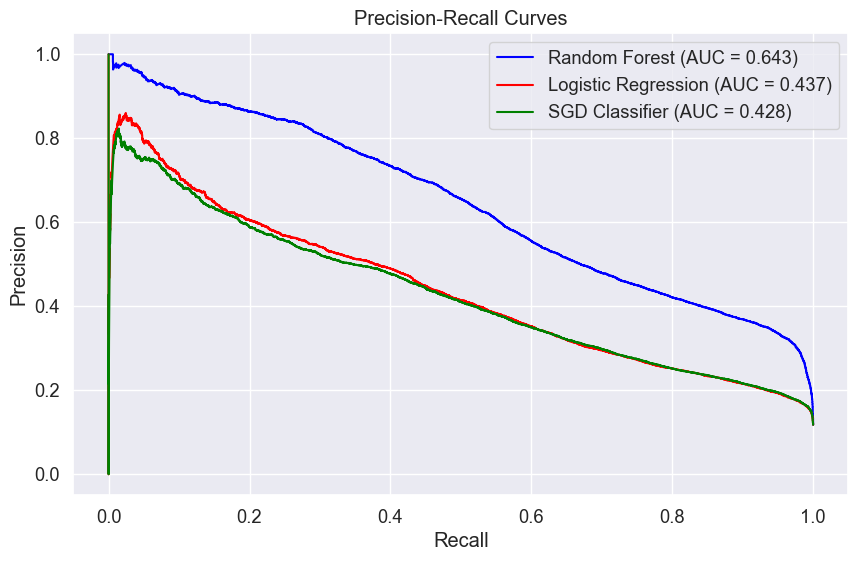

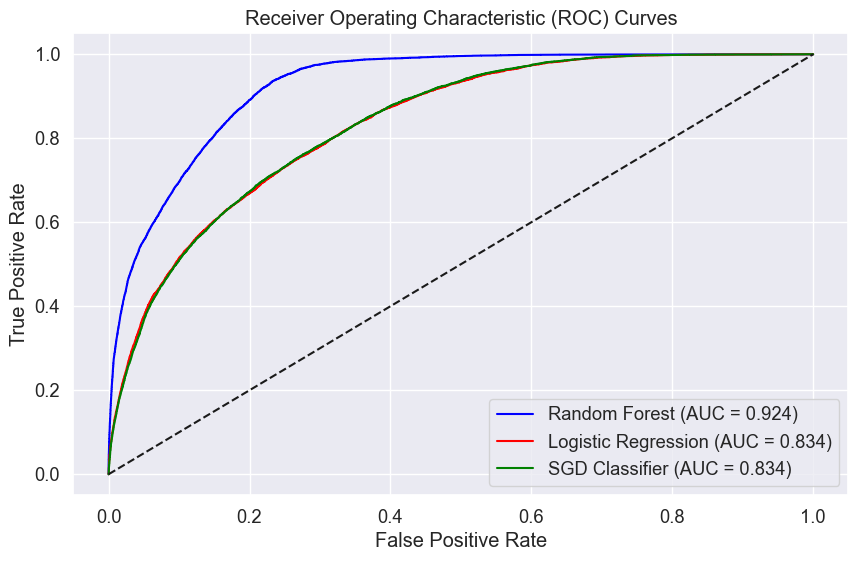


Comprehensive Metrics Summary:
              Model  Accuracy  Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)  Matthews Correlation  Cohen Kappa  ROC-AUC  PR-AUC
      Random Forest     0.854                0.434             0.780               0.558                 0.508        0.479    0.924   0.643
Logistic Regression     0.692                0.250             0.806               0.381                 0.320        0.246    0.834   0.437
     SGD Classifier     0.661                0.237             0.845               0.370                 0.315        0.228    0.834   0.428


In [47]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, cohen_kappa_score, confusion_matrix,
    roc_curve, auc, balanced_accuracy_score
)

# Calculate Matthews Correlation Coefficient and Cohen's Kappa for all models
metrics_dict = {
    'Random Forest': {
        'predictions': y_pred_rf,
        'Matthews Correlation': matthews_corrcoef(y_test, y_pred_rf),
        'Cohen Kappa': cohen_kappa_score(y_test, y_pred_rf)
    },
    'Logistic Regression': {
        'predictions': y_pred_lg,
        'Matthews Correlation': matthews_corrcoef(y_test, y_pred_lg),
        'Cohen Kappa': cohen_kappa_score(y_test, y_pred_lg)
    },
    'SGD Classifier': {
        'predictions': y_pred_sgd,
        'Matthews Correlation': matthews_corrcoef(y_test, y_pred_sgd),
        'Cohen Kappa': cohen_kappa_score(y_test, y_pred_sgd)
    }
}

# Print metrics
for model_name, metrics in metrics_dict.items():
    print(f"\n{model_name}:")
    print(f"Matthews Correlation Coefficient: {metrics['Matthews Correlation']:.3f}")
    print(f"Cohen's Kappa: {metrics['Cohen Kappa']:.3f}")

# Get probability predictions for ROC and PR curves
y_prob_rf = final_pipeline_rf.predict_proba(X_test)[:, 1]
y_prob_lg = final_pipeline_lg.predict_proba(X_test)[:, 1]
y_prob_sgd = final_pipeline_sgd.decision_function(X_test)  # SGD uses decision_function instead of predict_proba

# Create figure for Precision-Recall curves
plt.figure(figsize=(10, 6))

# Plot PR curves for each model
for model_name, color in zip(['Random Forest', 'Logistic Regression', 'SGD Classifier'], ['blue', 'red', 'green']):
    if model_name == 'SGD Classifier':
        y_prob = y_prob_sgd
    elif model_name == 'Random Forest':
        y_prob = y_prob_rf
    else:
        y_prob = y_prob_lg
        
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision, color=color, label=f'{model_name} (AUC = {pr_auc:.3f})')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Create figure for ROC curves
plt.figure(figsize=(10, 6))

# Plot ROC curves for each model
for model_name, color in zip(['Random Forest', 'Logistic Regression', 'SGD Classifier'], ['blue', 'red', 'green']):
    if model_name == 'SGD Classifier':
        y_prob = y_prob_sgd
    elif model_name == 'Random Forest':
        y_prob = y_prob_rf
    else:
        y_prob = y_prob_lg
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Create a comprehensive metrics summary DataFrame
metrics_summary = pd.DataFrame({
    'Model': [],
    'Accuracy': [],
    'Precision (Class 1)': [],
    'Recall (Class 1)': [],
    'F1-Score (Class 1)': [],
    'Matthews Correlation': [],
    'Cohen Kappa': [],
    'ROC-AUC': [],
    'PR-AUC': []
})

for model_name in ['Random Forest', 'Logistic Regression', 'SGD Classifier']:
    if model_name == 'SGD Classifier':
        y_prob = y_prob_sgd
    elif model_name == 'Random Forest':
        y_prob = y_prob_rf
    else:
        y_prob = y_prob_lg
        
    # Calculate ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Calculate PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    
    # Get predictions
    preds = metrics_dict[model_name]['predictions']
    
    # Add to summary
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy_score(y_test, preds)],
        'Precision (Class 1)': [precision_score(y_test, preds)],
        'Recall (Class 1)': [recall_score(y_test, preds)],
        'F1-Score (Class 1)': [f1_score(y_test, preds)],
        'Matthews Correlation': [metrics_dict[model_name]['Matthews Correlation']],
        'Cohen Kappa': [metrics_dict[model_name]['Cohen Kappa']],
        'ROC-AUC': [roc_auc],
        'PR-AUC': [pr_auc]
    })
    
    metrics_summary = pd.concat([metrics_summary, new_row], ignore_index=True)

# Display the comprehensive summary
print("\nComprehensive Metrics Summary:")
print(metrics_summary.round(3).to_string(index=False))

In [ ]:
Comprehensive Metrics Summary:
              Model  Accuracy  Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)  Matthews Correlation
      Random Forest     0.854                0.434             0.780               0.558                 0.508
Logistic Regression     0.692                0.250             0.806               0.381                 0.320
     SGD Classifier     0.661                0.237             0.845               0.370                 0.315